In [470]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [471]:
data=pd.read_csv(r"C:\Users\Asus\Downloads\Credit_score.csv",low_memory=False)
data.head()

ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0      19114.12            1824.843333                  3  ...   
1      19114.12                    NaN                  3  ...   
2      19114.12                    NaN                  3  ...   
3      19114.12                    NaN                  3  ...   
4      19114.12            1824.843333                  3  ...   

   Num_Credit_Inquiries  Credit_Mix Outstanding_Debt Credit_Utilization_Ratio  \
0                   4.0           _           809.98                26.822620   
1                   4.0        Good           809.98                31.944960   
2                   4.0        Good           809.98                28.609352   
3                   4.0        Good           809.98                31.377862   
4                   4.0        Good           809.98                24.797347   

      Credit_History_Age Payment_of_Min_Amount Total_EMI_per_month  \
0  22 Years and 1 Months                    No           49.574949   
1                    NaN                    No           49.574949   
2  22 Years and 3 Months                    No           49.574949   
3  22 Years and 4 Months                    No           49.574949   
4  22 Years and 5 Months                    No           49.574949   

   Amount_invested_monthly                 Payment_Behaviour Monthly_Balance  
0              80.41529544   High_spent_Small_value_payments     312.4940887  
1              118.2802216    Low_spent_Large_value_payments     284.6291625  
2              81.69952126   Low_spent_Medium_value_payments     331.2098629  
3              199.4580744    Low_spent_Small_value_payments     223.4513097  
4              41.42015309  High_spent_Medium_value_payments      341.489231  

[5 rows x 27 columns]

In [472]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [473]:
###addressing data inconsistency in columns.convert the object data type into flaot datatype.
def str_to_flaot(s):
    try:
        s=s.replace('_','')
        if s=='':
            return 0
        else:
            return float(s)
    except:
        return float(s)
target_columns=['Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit','Outstanding_Debt','Monthly_Balance']
for col in target_columns:
    data[col]=data[col].apply(str_to_flaot)

In [474]:
#lets recognise the columns which are categorical variables and try to map them with respective numerals
cat_var=[]
for i in data.columns:
    if data[i].nunique()<20:
        cat_var.append(i)
print(cat_var)

['Month', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']


In [475]:
for i in cat_var:
    print(i)
    print(data[i].unique())

Month
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']
Occupation
['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']
Credit_Mix
['_' 'Good' 'Standard' 'Bad']
Payment_of_Min_Amount
['No' 'NM' 'Yes']
Payment_Behaviour
['High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' '!@9#%8'
 'High_spent_Large_value_payments']


In [476]:
#lets map months with numericals from 1 to 8
dict={}
n=1
for i in data['Month'].unique():
    dict[i]=n
    n+=1
data['Month']=data['Month'].map(dict)

In [477]:
####let clean the data in occupation column.replace the '____' with respect occuaptions for each customer id
occupation=data[data['Occupation']!='_______'][['Customer_ID','Occupation']].drop_duplicates(keep='first')
data=pd.merge(left=data,right=occupation,on='Customer_ID')
data.drop(columns=['Occupation_x'],inplace=True)
data=data.rename(columns={'Occupation_y':'occupation'})


In [478]:
data=data.rename(columns={'Occupation_y':'occupation'})
data.head()

ID Customer_ID  Month           Name   Age          SSN  Annual_Income  \
0  0x1602   CUS_0xd40      1  Aaron Maashoh    23  821-00-0265       19114.12   
1  0x1603   CUS_0xd40      2  Aaron Maashoh    23  821-00-0265       19114.12   
2  0x1604   CUS_0xd40      3  Aaron Maashoh  -500  821-00-0265       19114.12   
3  0x1605   CUS_0xd40      4  Aaron Maashoh    23  821-00-0265       19114.12   
4  0x1606   CUS_0xd40      5  Aaron Maashoh    23  821-00-0265       19114.12   

   Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  ...  Credit_Mix  \
0            1824.843333                  3                4  ...           _   
1                    NaN                  3                4  ...        Good   
2                    NaN                  3                4  ...        Good   
3                    NaN                  3                4  ...        Good   
4            1824.843333                  3                4  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     Credit_History_Age  \
0            809.98                26.822620  22 Years and 1 Months   
1            809.98                31.944960                    NaN   
2            809.98                28.609352  22 Years and 3 Months   
3            809.98                31.377862  22 Years and 4 Months   
4            809.98                24.797347  22 Years and 5 Months   

   Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                     No            49.574949              80.41529544   
1                     No            49.574949              118.2802216   
2                     No            49.574949              81.69952126   
3                     No            49.574949              199.4580744   
4                     No            49.574949              41.42015309   

                  Payment_Behaviour  Monthly_Balance  occupation  
0   High_spent_Small_value_payments       312.494089   Scientist  
1    Low_spent_Large_value_payments       284.629163   Scientist  
2   Low_spent_Medium_value_payments       331.209863   Scientist  
3    Low_spent_Small_value_payments       223.451310   Scientist  
4  High_spent_Medium_value_payments       341.489231   Scientist  

[5 rows x 27 columns]

In [479]:
data.groupby(by=['Customer_ID','Credit_Mix'])['ID'].count()

Customer_ID  Credit_Mix
CUS_0x1000   Bad           8
CUS_0x1009   Standard      5
             _             3
CUS_0x100b   Good          7
             _             1
                          ..
CUS_0xff6    _             1
CUS_0xffc    Bad           6
             _             2
CUS_0xffd    Standard      6
             _             2
Name: ID, Length: 22977, dtype: int64

In [480]:
##lets eliminate '_' from credit mix and replace it with respect credit mix data for respective customers
credit_mix=data[data['Credit_Mix']!='_'][['Customer_ID','Credit_Mix']].drop_duplicates()
data=pd.merge(left=data,right=credit_mix,on='Customer_ID')
data.drop(columns='Credit_Mix_x',inplace=True)
data=data.rename(columns={'Credit_Mix_y':'credit_mix'})

In [481]:
data['credit_mix'].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [482]:
#credit mix variables are ordinal variables.so lets map them with numericals to establish the order
data['credit_mix']=data['credit_mix'].map({'Good':2, 'Standard':1, 'Bad':0})

In [483]:
cat_var

['Month',
 'Occupation',
 'Credit_Mix',
 'Payment_of_Min_Amount',
 'Payment_Behaviour']

In [484]:
data['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [485]:
data.groupby('Payment_of_Min_Amount').median()

Month  Annual_Income  Monthly_Inhand_Salary  \
Payment_of_Min_Amount                                                
NM                       4.0       37889.06            3104.813333   
No                       5.0       45705.78            3828.355000   
Yes                      4.0       32167.36            2644.078333   

                       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
Payment_of_Min_Amount                                                      
NM                                   6.0              5.0           14.0   
No                                   4.0              5.0            8.0   
Yes                                  7.0              6.0           19.0   

                       Num_of_Loan  Delay_from_due_date  \
Payment_of_Min_Amount                                     
NM                             3.0                 18.0   
No                             2.0                 11.0   
Yes                            4.0                 24.0   

                       Num_of_Delayed_Payment  Changed_Credit_Limit  \
Payment_of_Min_Amount                                                 
NM                                       14.0                  9.24   
No                                        9.0                  6.04   
Yes                                      17.0                 12.60   

                       Num_Credit_Inquiries  Outstanding_Debt  \
Payment_of_Min_Amount                                           
NM                                      6.0          1170.580   
No                                      3.0           725.530   
Yes                                     8.0          1642.515   

                       Credit_Utilization_Ratio  Total_EMI_per_month  \
Payment_of_Min_Amount                                                  
NM                                    32.301163            70.478333   
No                                    32.865462            56.502790   
Yes                                   31.963726            76.983459   

                       Monthly_Balance  credit_mix  
Payment_of_Min_Amount                               
NM                          338.226537         1.0  
No                          410.676705         2.0  
Yes                         302.998277         1.0

In [486]:
def str_to_float(s):
    try:
        s=s.replace('_','')
        if s=='':
            return 0
        else:
            return float(s)
    except:
        return float(s)
data['Age']=data['Age'].apply(str_to_float)

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

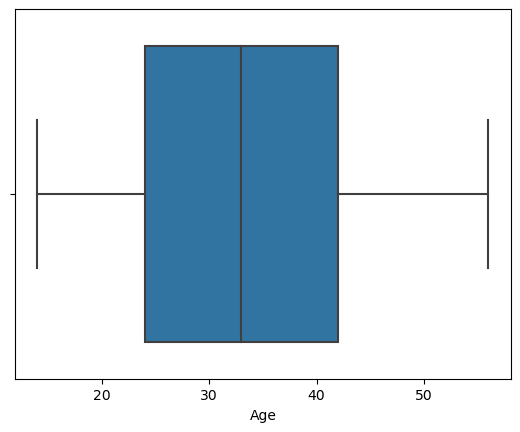

In [487]:
age=data.groupby(by='Customer_ID')['Age'].median().reset_index()
sns.boxplot(age['Age'])

In [488]:
#lets replace the age for each customers with their median age to eliminate the outliers in the data
data=pd.merge(left=data,right=age,on='Customer_ID')
data=data.drop(columns=['Age_x'])
data=data.rename(columns={'Age_y':'Age'})

In [489]:
##name is not necesry for computation of credit score 
#we can drop the name column
data.drop(columns='Name',inplace=True)

In [490]:
##social security number is not necessary for the computation of credit score
##we can drop ssn column,but before dropping lets check wheter any 2 customer id matches with same social security number
data['SSN'].value_counts()
##we can drop this column
data.drop(columns=['SSN'],inplace=True)

In [491]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  int64  
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  float64
 9   Type_of_Loan              88592 non-null   object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   float64
 12  Changed_Credit_Limit      100000 non-null  float64
 13  Num_Credit_Inquiries      98035 non-null   fl

In [492]:
#lets clean in consitency in monthly inhand salary
###lets substitute the null values in the monthly inhand salary column with median salary wrt each customers
monthly_inhand=data.groupby(by='Customer_ID')['Monthly_Inhand_Salary'].median().reset_index()
#data[['Customer_ID','Monthly_Inhand_Salary']]
data=pd.merge(left=data,right=monthly_inhand,on='Customer_ID')
data.drop(columns=['Monthly_Inhand_Salary_x'],inplace=True)
data=data.rename(columns={'Monthly_Inhand_Salary_x':'monthly_inhand_salary'})

In [493]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  int64  
 3   Annual_Income             100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  float64
 8   Type_of_Loan              88592 non-null   object 
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Outstanding_Debt          100000 non-null  fl

In [494]:
data['Amount_invested_monthly']=data['Amount_invested_monthly'].apply(str_to_float)

In [495]:
##the credit history age is in years and months 
#lets bring this in form of months only
def months(s):
    try:
        a=s.split()
        return int(a[0])*12+int(a[3])
    except:
        return 0
data['credit_history_in_month']=data['Credit_History_Age'].apply(months)

In [496]:
##lets fill null values in credit history in months columns
history=list(data['credit_history_in_month'])
for i in range(100000):
    if history[i]==0:
        position=i%8
        for j in range(position+1,8):
            if history[(i//8)*8+j]!=0:
                history[i]=history[(i//8)*8+j]-j+position
                break
        for j in range(position-1,-1,-1):
            if history[(i//8)*8+j]!=0:
                history[i]=history[(i//8)*8+j]-j+position
                break
data['credit_history_in_month']=history
data['credit_history_in_month']

0        265
1        266
2        267
3        268
4        269
        ... 
99995    378
99996    379
99997    380
99998    381
99999    382
Name: credit_history_in_month, Length: 100000, dtype: int64

In [497]:
data.drop(columns='Credit_History_Age',inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  int64  
 3   Annual_Income             100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  float64
 8   Type_of_Loan              88592 non-null   object 
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Outstanding_Debt          100000 non-null  fl

In [498]:
#list of all loan types offered by the platform
types_of_loan_offered=[]
for loan in data['Type_of_Loan'].unique():
    try:
        loan=loan.replace(', and',',')
        for i in loan.split(','):
            if i.strip() not in types_of_loan_offered:
                types_of_loan_offered.append(i.strip())
    except:
        pass
types_of_loan_offered   

['Auto Loan',
 'Credit-Builder Loan',
 'Personal Loan',
 'Home Equity Loan',
 'Not Specified',
 'Mortgage Loan',
 'Student Loan',
 'Debt Consolidation Loan',
 'Payday Loan']

In [499]:
def return_loan(df,word):
    array=[]
    for i in list(df['Type_of_Loan']):
        try:
            array.append(i.count(word))
        except:
            array.append(0)
    df[word]=array
    return df[['Type_of_Loan',word]]

In [500]:
for i in types_of_loan_offered:
    return_loan(data,i)


In [501]:
##now we can drop type_of_loan column from the dataframe
data.drop(columns='Type_of_Loan',inplace=True)

In [502]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 33 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  int64  
 3   Annual_Income             100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  float64
 8   Delay_from_due_date       100000 non-null  int64  
 9   Num_of_Delayed_Payment    92998 non-null   float64
 10  Changed_Credit_Limit      100000 non-null  float64
 11  Num_Credit_Inquiries      98035 non-null   float64
 12  Outstanding_Debt          100000 non-null  float64
 13  Credit_Utilization_Ratio  100000 non-null  fl

In [503]:
# 'Payment_of_Min_Amount','Payment_Behaviour','occupation'

In [504]:
#for payment behavior columns lets create 2 columns i.e spend and value payment
def spent(s):
    try:
        a=s.split('_')
        return a[0]
    except:
        return s
def value_payments(s):
    try:
        a=s.split('_')
        return a[2]
    except:
        return s
data['spent']=data['Payment_Behaviour'].apply(spent)
data['value_payment']=data['Payment_Behaviour'].apply(value_payments)

In [505]:
data['spent'].unique()

array(['High', 'Low', '!@9#%8'], dtype=object)

In [506]:
data['value_payment'].unique()

array(['Small', 'Large', 'Medium', '!@9#%8'], dtype=object)

In [507]:
data[data['spent']=='!@9#%8'].shape

(7600, 35)

In [508]:
data=pd.get_dummies(data,columns=['spent','value_payment'])
data.drop(columns=['spent_!@9#%8','value_payment_!@9#%8'],inplace=True)
data.head()

ID Customer_ID  Month  Annual_Income  Num_Bank_Accounts  \
0  0x1602   CUS_0xd40      1       19114.12                  3   
1  0x1603   CUS_0xd40      2       19114.12                  3   
2  0x1604   CUS_0xd40      3       19114.12                  3   
3  0x1605   CUS_0xd40      4       19114.12                  3   
4  0x1606   CUS_0xd40      5       19114.12                  3   

   Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0                4              3          4.0                    3   
1                4              3          4.0                   -1   
2                4              3          4.0                    3   
3                4              3          4.0                    5   
4                4              3          4.0                    6   

   Num_of_Delayed_Payment  ...  Not Specified  Mortgage Loan  Student Loan  \
0                     7.0  ...              0              0             0   
1                     NaN  ...              0              0             0   
2                     7.0  ...              0              0             0   
3                     4.0  ...              0              0             0   
4                     NaN  ...              0              0             0   

   Debt Consolidation Loan Payday Loan  spent_High  spent_Low  \
0                        0           0           1          0   
1                        0           0           0          1   
2                        0           0           0          1   
3                        0           0           0          1   
4                        0           0           1          0   

  value_payment_Large  value_payment_Medium value_payment_Small  
0                   0                     0                   1  
1                   1                     0                   0  
2                   0                     1                   0  
3                   0                     0                   1  
4                   0                     1                   0  

[5 rows x 38 columns]

In [509]:
data.drop(columns=['Payment_Behaviour'],inplace=True)
data=pd.get_dummies(data,columns=['Payment_of_Min_Amount','occupation'])

In [510]:
data[['Num_of_Delayed_Payment','Num_Credit_Inquiries','Amount_invested_monthly','Monthly_Balance']]

Num_of_Delayed_Payment  Num_Credit_Inquiries  Amount_invested_monthly  \
0                         7.0                   4.0                80.415295   
1                         NaN                   4.0               118.280222   
2                         7.0                   4.0                81.699521   
3                         4.0                   4.0               199.458074   
4                         NaN                   4.0                41.420153   
...                       ...                   ...                      ...   
99995                     7.0                   3.0                60.971333   
99996                     7.0                   3.0                54.185950   
99997                     6.0                   3.0                24.028477   
99998                     NaN                   3.0               251.672582   
99999                     6.0                   3.0               167.163865   

       Monthly_Balance  
0           312.494089  
1           284.629163  
2           331.209863  
3           223.451310  
4           341.489231  
...                ...  
99995       479.866228  
99996       496.651610  
99997       516.809083  
99998       319.164979  
99999       393.673696  

[100000 rows x 4 columns]

In [511]:
data.describe().T

count          mean           std           min  \
Month                      100000.0  4.500000e+00  2.291299e+00  1.000000e+00   
Annual_Income              100000.0  1.764157e+05  1.429618e+06  7.005930e+03   
Num_Bank_Accounts          100000.0  1.709128e+01  1.174048e+02 -1.000000e+00   
Num_Credit_Card            100000.0  2.247443e+01  1.290574e+02  0.000000e+00   
Interest_Rate              100000.0  7.246604e+01  4.664226e+02  1.000000e+00   
Num_of_Loan                100000.0  3.009960e+00  6.264788e+01 -1.000000e+02   
Delay_from_due_date        100000.0  2.106878e+01  1.486010e+01 -5.000000e+00   
Num_of_Delayed_Payment      92998.0  3.092334e+01  2.260319e+02 -3.000000e+00   
Changed_Credit_Limit       100000.0  1.017179e+01  6.880628e+00 -6.490000e+00   
Num_Credit_Inquiries        98035.0  2.775425e+01  1.931773e+02  0.000000e+00   
Outstanding_Debt           100000.0  1.426220e+03  1.155129e+03  2.300000e-01   
Credit_Utilization_Ratio   100000.0  3.228517e+01  5.116875e+00  2.000000e+01   
Total_EMI_per_month        100000.0  1.403118e+03  8.306041e+03  0.000000e+00   
Amount_invested_monthly     95521.0  6.374130e+02  2.043319e+03  0.000000e+00   
Monthly_Balance             98800.0 -3.036437e+22  3.181295e+24 -3.333333e+26   
credit_mix                 100000.0  1.066160e+00  7.329040e-01  0.000000e+00   
Age                        100000.0  3.331256e+01  1.076392e+01  1.400000e+01   
Monthly_Inhand_Salary_y    100000.0  4.198390e+03  3.187570e+03  3.036454e+02   
credit_history_in_month    100000.0  2.212069e+02  9.968111e+01  1.000000e+00   
Auto Loan                  100000.0  3.799200e-01  6.401757e-01  0.000000e+00   
Credit-Builder Loan        100000.0  4.044000e-01  6.674617e-01  0.000000e+00   
Personal Loan              100000.0  3.888800e-01  6.456443e-01  0.000000e+00   
Home Equity Loan           100000.0  3.910400e-01  6.468786e-01  0.000000e+00   
Not Specified              100000.0  3.961600e-01  6.509236e-01  0.000000e+00   
Mortgage Loan              100000.0  3.893600e-01  6.424974e-01  0.000000e+00   
Student Loan               100000.0  3.896800e-01  6.499798e-01  0.000000e+00   
Debt Consolidation Loan    100000.0  3.877600e-01  6.450786e-01  0.000000e+00   
Payday Loan                100000.0  4.056800e-01  6.642802e-01  0.000000e+00   
spent_High                 100000.0  4.260100e-01  4.944976e-01  0.000000e+00   
spent_Low                  100000.0  4.979900e-01  4.999985e-01  0.000000e+00   
value_payment_Large        100000.0  2.414600e-01  4.279707e-01  0.000000e+00   
value_payment_Medium       100000.0  3.140100e-01  4.641227e-01  0.000000e+00   
value_payment_Small        100000.0  3.685300e-01  4.824085e-01  0.000000e+00   
Payment_of_Min_Amount_NM   100000.0  1.200700e-01  3.250450e-01  0.000000e+00   
Payment_of_Min_Amount_No   100000.0  3.566700e-01  4.790186e-01  0.000000e+00   
Payment_of_Min_Amount_Yes  100000.0  5.232600e-01  4.994612e-01  0.000000e+00   
occupation_Accountant      100000.0  6.744000e-02  2.507837e-01  0.000000e+00   
occupation_Architect       100000.0  6.824000e-02  2.521586e-01  0.000000e+00   
occupation_Developer       100000.0  6.720000e-02  2.503693e-01  0.000000e+00   
occupation_Doctor          100000.0  6.568000e-02  2.477231e-01  0.000000e+00   
occupation_Engineer        100000.0  6.864000e-02  2.528422e-01  0.000000e+00   
occupation_Entrepreneur    100000.0  6.648000e-02  2.491205e-01  0.000000e+00   
occupation_Journalist      100000.0  6.536000e-02  2.471612e-01  0.000000e+00   
occupation_Lawyer          100000.0  7.096000e-02  2.567593e-01  0.000000e+00   
occupation_Manager         100000.0  6.432000e-02  2.453233e-01  0.000000e+00   
occupation_Mechanic        100000.0  6.776000e-02  2.513349e-01  0.000000e+00   
occupation_Media_Manager   100000.0  6.720000e-02  2.503693e-01  0.000000e+00   
occupation_Musician        100000.0  6.352000e-02  2.438971e-01  0.000000e+00   
occupation_Scientist       100000.0  6.744000e-02  2.507837e-

TypeError: xlabel() missing 1 required positional argument: 'xlabel'

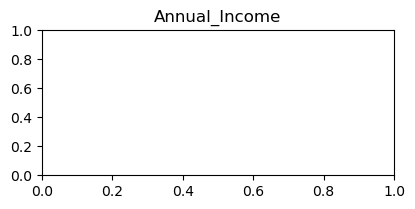

In [512]:
nom_var=[]
for i in data.columns:
    if data[i].dtype!='O' and data[i].nunique()>10:
        nom_var.append(i)
l=len(nom_var)
n=1
plt.figure(figsize=(10,20))
for i in nom_var[:10]:
    plt.subplot(l//2+1,2,n)
    plt.title(i)
    plt.xlabel()
    n+=1
    sns.histplot(data[i])
    

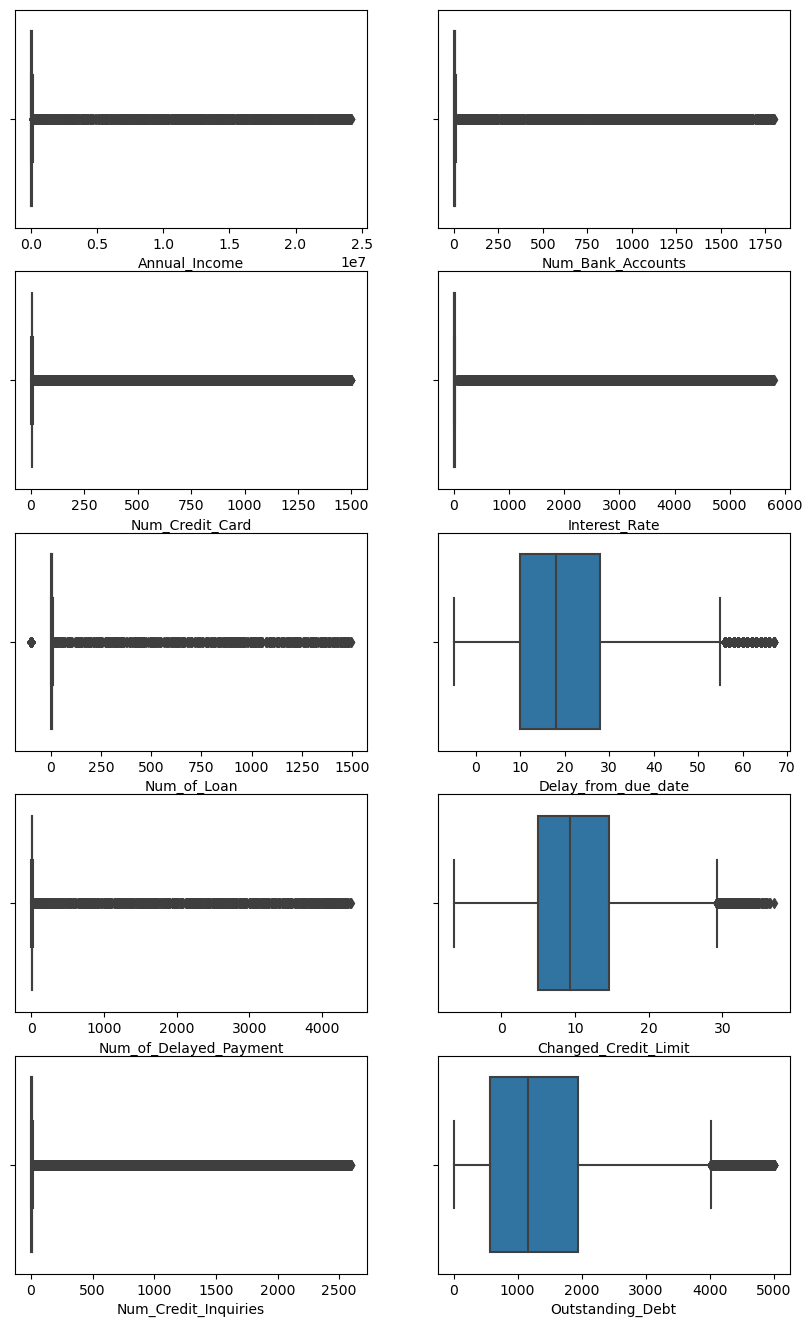

In [513]:
l=len(nom_var)
n=1
plt.figure(figsize=(10,30))
for i in nom_var[:10]:
    plt.subplot(l//2+1,2,n)
    n+=1
    sns.boxplot(x=data[i])

In [514]:
###removing outliers or impputing them with respective values
iqr=np.percentile(data['Num_Credit_Inquiries'],75)-np.percentile(data['Num_Credit_Inquiries'],25)
mx=np.percentile(data['Num_Credit_Inquiries'],75)+1.5*iqr
mn=np.percentile(data['Num_Credit_Inquiries'],25)-1.5*iqr
print(mn,mx,iqr)

nan nan nan


In [515]:
np.median(np.array(data['Num_Credit_Inquiries']))

nan

In [516]:
data[data['Num_Credit_Inquiries'].isnull()]

ID Customer_ID  Month  Annual_Income  Num_Bank_Accounts  \
18      0x161c  CUS_0x2dbc      3     143162.640                  1   
47      0x1645  CUS_0x95ee      8      73928.460                  4   
113     0x16ab   CUS_0xff4      2      25546.260                  8   
115     0x16ad   CUS_0xff4      4      25546.260                  8   
187     0x1719  CUS_0x5b48      4      12600.445                  5   
...        ...         ...    ...            ...                ...   
99768  0x25e96  CUS_0xc345      1      60015.320                  7   
99852  0x25f12  CUS_0x3048      5      81093.160                 10   
99874  0x25f34  CUS_0x3855      3     118677.540                  4   
99900  0x25f5a  CUS_0x4986      5      41329.560                  2   
99901  0x25f5b  CUS_0x4986      6      41329.560                  2   

       Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
18                   5              8          3.0                    8   
47                   5              8          0.0                    8   
113                  7             14          5.0                   16   
115                  7             14          5.0                   16   
187                  5             10          3.0                   25   
...                ...            ...          ...                  ...   
99768                4             14          7.0                    8   
99852                7             17          7.0                   25   
99874                4              6          4.0                    3   
99900                3              7          1.0                    1   
99901                3              7       -100.0                    2   

       Num_of_Delayed_Payment  ...  occupation_Entrepreneur  \
18                        7.0  ...                        0   
47                        7.0  ...                        0   
113                      13.0  ...                        1   
115                      10.0  ...                        1   
187                      18.0  ...                        0   
...                       ...  ...                      ...   
99768                     8.0  ...                        0   
99852                    20.0  ...                        0   
99874                    11.0  ...                        0   
99900                    10.0  ...                        1   
99901                    10.0  ...                        1   

       occupation_Journalist  occupation_Lawyer  occupation_Manager  \
18                         0                  0                   0   
47                         0                  1                   0   
113                        0                  0                   0   
115                        0                  0                   0   
187                        0                  1                   0   
...                      ...                ...                 ...   
99768                      0                  0                   0   
99852                      0                  0                   0   
99874                      0                  0                   0   
99900                      0                  0                   0   
99901                      0                  0                   0   

       occupation_Mechanic  occupation_Media_Manager  occupation_Musician  \
18                       0                         0                    0   
47                       0                         0                    0   
113                      0                         0                    0   
115                      0                         0                    0   
187                      0                         0                    0   
...                    ...                       ...                  ...   
99768                    0                         0                    0   
99852                    0      

In [517]:
data[data['Customer_ID']=='CUS_0x3048']['Num_Credit_Inquiries']

99848     7.0
99849     7.0
99850    12.0
99851    12.0
99852     NaN
99853    12.0
99854    12.0
99855    12.0
Name: Num_Credit_Inquiries, dtype: float64

In [518]:
from sklearn.cluster import KMeans

In [519]:
data.isnull().sum()
##lets treat the null values in the columns.before that lets explore the nature of null values in the dataframe
null_target_columns=['Num_of_Delayed_Payment','Num_Credit_Inquiries','Amount_invested_monthly','Monthly_Balance']

In [520]:
null_target_columns

['Num_of_Delayed_Payment',
 'Num_Credit_Inquiries',
 'Amount_invested_monthly',
 'Monthly_Balance']

In [521]:
data[['Customer_ID','Num_of_Delayed_Payment']]
##for null values in the number of delayed payment column lets fill the pre

Customer_ID  Num_of_Delayed_Payment
0       CUS_0xd40                     7.0
1       CUS_0xd40                     NaN
2       CUS_0xd40                     7.0
3       CUS_0xd40                     4.0
4       CUS_0xd40                     NaN
...           ...                     ...
99995  CUS_0x942c                     7.0
99996  CUS_0x942c                     7.0
99997  CUS_0x942c                     6.0
99998  CUS_0x942c                     NaN
99999  CUS_0x942c                     6.0

[100000 rows x 2 columns]

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Num_of_Delayed_Payment'>

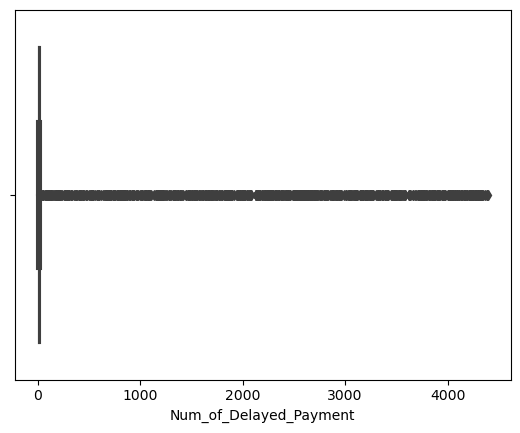

In [522]:
sns.boxplot(data['Num_of_Delayed_Payment'])

In [523]:
data[(data.index%8!=0)]['Num_of_Delayed_Payment'].fillna(method='ffill')
data['Num_of_Delayed_Payment']=data['Num_of_Delayed_Payment'].fillna(method='bfill')
#& (data['Num_of_Delayed_Payment'].isnull())

In [524]:
data['Num_Credit_Inquiries']=data['Num_Credit_Inquiries'].fillna(method='ffill')

In [525]:
##here we don't know the exact investment for each customers .so let's assume that the customers have not invested on that month.
#so lets fill null values with zero
data['Amount_invested_monthly']=data['Amount_invested_monthly'].fillna(value=0)

In [526]:
data[data['Monthly_Balance'].isnull()]

ID Customer_ID  Month  Annual_Income  Num_Bank_Accounts  \
197     0x1727  CUS_0xa5f9      6       57983.12                  9   
314     0x17d8  CUS_0x571f      3       66567.32                  5   
388     0x1846  CUS_0x9b3c      5       81842.28                 10   
456     0x18ae  CUS_0x9d78      1       69977.60                 10   
457     0x18af  CUS_0x9d78      2       69977.60                 10   
...        ...         ...    ...            ...                ...   
99820  0x25ee2  CUS_0x40ad      5       65858.48                  7   
99839  0x25efd  CUS_0x8788      8       71025.40                  7   
99852  0x25f12  CUS_0x3048      5       81093.16                 10   
99854  0x25f14  CUS_0x3048      7       81093.16                 10   
99927  0x25f81  CUS_0x2654      8      139664.96                  3   

       Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
197                  8             31          8.0                   46   
314                  7              5          2.0                    7   
388                  9             25          9.0                   20   
456                  7             20          9.0                   49   
457                  7             20          9.0                   49   
...                ...            ...          ...                  ...   
99820                7             30          5.0                   32   
99839                6             32          5.0                   30   
99852                7             17          7.0                   25   
99854                7             17          7.0                   32   
99927                6             12          4.0                   14   

       Num_of_Delayed_Payment  ...  occupation_Entrepreneur  \
197                      21.0  ...                        0   
314                      12.0  ...                        0   
388                      17.0  ...                        0   
456                      18.0  ...                        0   
457                      18.0  ...                        0   
...                       ...  ...                      ...   
99820                    12.0  ...                        0   
99839                    16.0  ...                        0   
99852                    20.0  ...                        0   
99854                    18.0  ...                        0   
99927                    12.0  ...                        0   

       occupation_Journalist  occupation_Lawyer  occupation_Manager  \
197                        0                  0                   0   
314                        0                  0                   0   
388                        0                  1                   0   
456                        0                  0                   0   
457                        0                  0                   0   
...                      ...                ...                 ...   
99820                      0                  0                   0   
99839                      0                  0                   0   
99852                      0                  0                   0   
99854                      0                  0                   0   
99927                      0                  0                   0   

       occupation_Mechanic  occupation_Media_Manager  occupation_Musician  \
197                      1                         0                    0   
314                      0                         0                    0   
388                      0                         0                    0   
456                      0                         0                    0   
457                      0                         0                    0   
...                    ...                       ...                  ...   
99820                    0                         0                    0   
99839                    0      

In [527]:
data[data['Customer_ID'] == 'CUS_0x40ad'][['Customer_ID','Monthly_Balance']]

Customer_ID  Monthly_Balance
99816  CUS_0x40ad       438.990631
99817  CUS_0x40ad       365.683158
99818  CUS_0x40ad       135.336769
99819  CUS_0x40ad        75.742017
99820  CUS_0x40ad              NaN
99821  CUS_0x40ad       319.537658
99822  CUS_0x40ad       362.911693
99823  CUS_0x40ad       332.405927

In [528]:
#lets replace null values in monthly_balance column with median monthly_balance for respective customers
monthly_balance=data.groupby('Customer_ID')['Monthly_Balance'].median().reset_index()
data=pd.merge(left=data,right=monthly_balance,on='Customer_ID')
temp_df=data[['Monthly_Balance_x','Monthly_Balance_y']]


In [529]:
temp_df.drop(columns='Monthly_Balance_y',inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_43760\409868961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.drop(columns='Monthly_Balance_y',inplace=True)


In [530]:
data=pd.concat([data,temp_df],axis=1)
data.drop(columns=['Monthly_Balance_x','Monthly_Balance_y'],inplace=True)

In [531]:
data.isnull().sum()
###all null values are treated 
##in later part lets treat outliers

ID                           0
Customer_ID                  0
Month                        0
Annual_Income                0
Num_Bank_Accounts            0
Num_Credit_Card              0
Interest_Rate                0
Num_of_Loan                  0
Delay_from_due_date          0
Num_of_Delayed_Payment       0
Changed_Credit_Limit         0
Num_Credit_Inquiries         0
Outstanding_Debt             0
Credit_Utilization_Ratio     0
Total_EMI_per_month          0
Amount_invested_monthly      0
credit_mix                   0
Age                          0
Monthly_Inhand_Salary_y      0
credit_history_in_month      0
Auto Loan                    0
Credit-Builder Loan          0
Personal Loan                0
Home Equity Loan             0
Not Specified                0
Mortgage Loan                0
Student Loan                 0
Debt Consolidation Loan      0
Payday Loan                  0
spent_High                   0
spent_Low                    0
value_payment_Large          0
value_pa

In [532]:
nom_var=[]
for i in data.columns[2:]:
    if data[i].nunique()>10:
        nom_var.append(i)
nom_var  

['Annual_Income',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Age',
 'Monthly_Inhand_Salary_y',
 'credit_history_in_month']

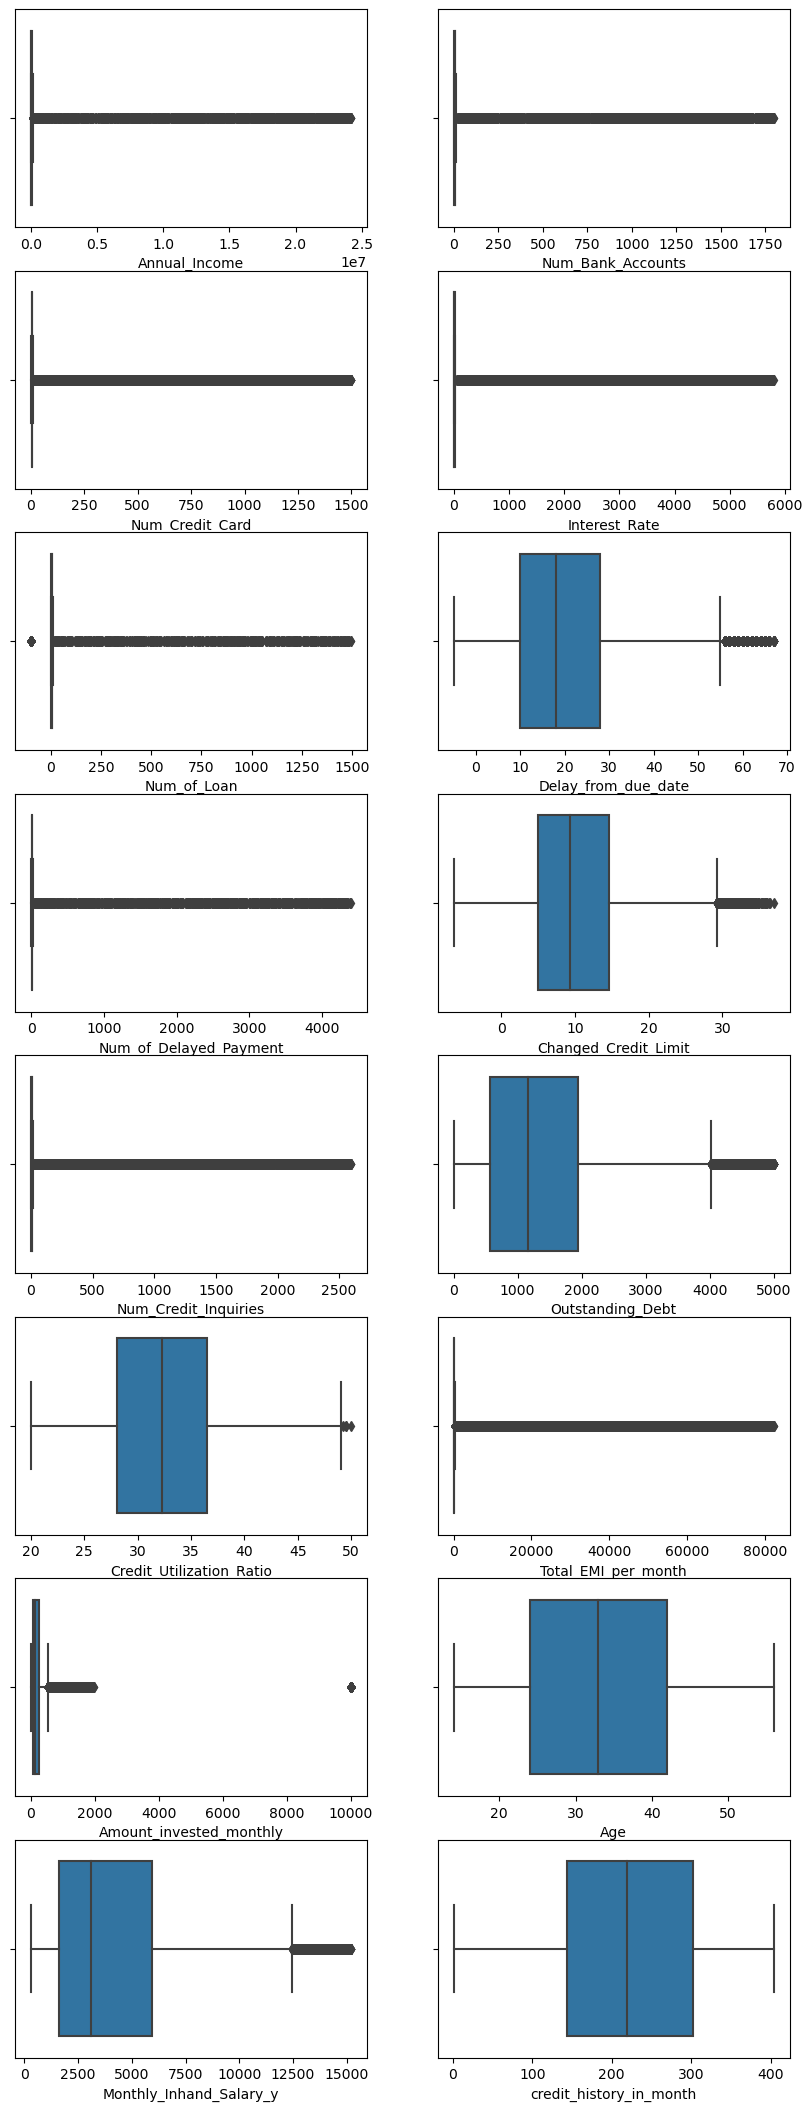

In [533]:
plt.figure(figsize=(10,30))
l=len(nom_var)
for i in range(1,len(nom_var)+1):
    plt.subplot(l//2+1,2,i)
    sns.boxplot(x=data[nom_var[i-1]])

In [534]:
for item in nom_var:
    iqr=np.percentile(data[item],75)-np.percentile(data[item],25)
    mx=np.percentile(data[item],75)+1.5*iqr
    mn=np.percentile(data[item],25)-1.5*iqr
    print(f'for {item} iqr is {iqr},max is {mx},min is {mn}')

for Annual_Income iqr is 53333.42,max is 152791.05,min is -60542.630000000005
for Num_Bank_Accounts iqr is 4.0,max is 13.0,min is -3.0
for Num_Credit_Card iqr is 3.0,max is 11.5,min is -0.5
for Interest_Rate iqr is 12.0,max is 38.0,min is -10.0
for Num_of_Loan iqr is 4.0,max is 11.0,min is -5.0
for Delay_from_due_date iqr is 18.0,max is 55.0,min is -17.0
for Num_of_Delayed_Payment iqr is 9.0,max is 31.5,min is -4.5
for Changed_Credit_Limit iqr is 9.690000000000001,max is 29.195,min is -9.565000000000001
for Num_Credit_Inquiries iqr is 6.0,max is 18.0,min is -6.0
for Outstanding_Debt iqr is 1379.89,max is 4015.7975,min is -1503.7625
for Credit_Utilization_Ratio iqr is 8.444096492499998,max is 49.162807791249996,min is 15.386421821250002
for Total_EMI_per_month iqr is 130.91758861,max is 357.600632015,min is -166.069722425
for Amount_invested_monthly iqr is 187.60698644250002,max is 536.4491775137501,min is -213.97876825625005
for Age iqr is 18.0,max is 69.0,min is -3.0
for Monthly_Inhan

In [535]:
data['Num_Bank_Accounts']=data['Num_Bank_Accounts'].apply(lambda x:0 if x<0 else x)
##replacing the number of account number less than 0 as 0

In [536]:
data[data['Num_Credit_Card']>11.5]

ID Customer_ID  Month  Annual_Income  Num_Bank_Accounts  \
10      0x1610  CUS_0x21b1      3       34847.84                  2   
40      0x163e  CUS_0x95ee      1       73928.46                  4   
157     0x16eb  CUS_0x4100      6       19300.34                  6   
163     0x16f5  CUS_0x132f      4       19514.88                  7   
207     0x1735  CUS_0x4d43      8       20787.69                  8   
...        ...         ...    ...            ...                ...   
99611  0x25da9  CUS_0x2829      4       64901.37                  3   
99615  0x25dad  CUS_0x2829      8       64901.37                  3   
99619  0x25db5  CUS_0xae66      4      142560.36                  6   
99769  0x25e97  CUS_0xc345      2       60015.32                  7   
99811  0x25ed5  CUS_0x64f0      4       39977.21                  4   

       Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
10                1385              6          1.0                    3   
40                1288              8          0.0                   12   
157               1029             17          5.0                   51   
163                488             17          0.0                   30   
207               1381             14          3.0                   22   
...                ...            ...          ...                  ...   
99611              514             20       -100.0                   14   
99615              232             20          0.0                   19   
99619             1430             13          1.0                   23   
99769              679             14        978.0                    8   
99811              158             11          0.0                   13   

       Num_of_Delayed_Payment  ...  occupation_Entrepreneur  \
10                       -1.0  ...                        0   
40                       10.0  ...                        0   
157                      17.0  ...                        1   
163                      12.0  ...                        0   
207                      14.0  ...                        1   
...                       ...  ...                      ...   
99611                    15.0  ...                        0   
99615                    18.0  ...                        0   
99619                    15.0  ...                        0   
99769                     8.0  ...                        0   
99811                    10.0  ...                        0   

       occupation_Journalist  occupation_Lawyer  occupation_Manager  \
10                         0                  0                   0   
40                         0                  1                   0   
157                        0                  0                   0   
163                        0                  0                   0   
207                        0                  0                   0   
...                      ...                ...                 ...   
99611                      1                  0                   0   
99615                      1                  0                   0   
99619                      0                  0                   0   
99769                      0                  0                   0   
99811                      0                  0                   0   

       occupation_Mechanic  occupation_Media_Manager  occupation_Musician  \
10                       0                         0                    0   
40                       0                         0                    0   
157                      0                         0                    0   
163                      0                         0                    1   
207                      0                         0                    0   
...                    ...                       ...                  ...   
99611                    0                         0                    0   
99615                    0      

In [537]:
data[data['Customer_ID']=='CUS_0x2829']['Num_Credit_Card']

99608      5
99609      5
99610      5
99611    514
99612      5
99613      5
99614      5
99615    232
Name: Num_Credit_Card, dtype: int64

In [538]:
###after close inspection of the outliers.It is difficult to fix outliers in each columns.Instead,we can take aggregte values 
#like median for 3 months or six months to solve the influence of outliers on the data processing.lets aggregate the data at customer level for last 3 months or 6 months data
last_3month=data[data['Month']>5]
last_3month

ID Customer_ID  Month  Annual_Income  Num_Bank_Accounts  \
5       0x1607   CUS_0xd40      6       19114.12                  3   
6       0x1608   CUS_0xd40      7       19114.12                  3   
7       0x1609   CUS_0xd40      8       19114.12                  3   
13      0x1613  CUS_0x21b1      6       34847.84                  2   
14      0x1614  CUS_0x21b1      7       34847.84                  2   
...        ...         ...    ...            ...                ...   
99990  0x25fe0  CUS_0x8600      7       20002.88                 10   
99991  0x25fe1  CUS_0x8600      8       20002.88                 10   
99997  0x25feb  CUS_0x942c      6       39628.99                  4   
99998  0x25fec  CUS_0x942c      7       39628.99                  4   
99999  0x25fed  CUS_0x942c      8       39628.99                  4   

       Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
5                    4              3          4.0                    8   
6                    4              3          4.0                    3   
7                    4              3          4.0                    3   
13                   4              6          1.0                    3   
14                   4              6          1.0                    3   
...                ...            ...          ...                  ...   
99990                8             29          5.0                   33   
99991                8             29          5.0                   33   
99997                6           5729          2.0                   27   
99998                6              7          2.0                   20   
99999                6              7          2.0                   18   

       Num_of_Delayed_Payment  ...  occupation_Entrepreneur  \
5                         4.0  ...                        0   
6                         8.0  ...                        0   
7                         6.0  ...                        0   
13                        0.0  ...                        0   
14                        4.0  ...                        0   
...                       ...  ...                      ...   
99990                    26.0  ...                        0   
99991                    25.0  ...                        0   
99997                     6.0  ...                        0   
99998                     6.0  ...                        0   
99999                     6.0  ...                        0   

       occupation_Journalist  occupation_Lawyer  occupation_Manager  \
5                          0                  0                   0   
6                          0                  0                   0   
7                          0                  0                   0   
13                         0                  0                   0   
14                         0                  0                   0   
...                      ...                ...                 ...   
99990                      0                  0                   0   
99991                      0                  0                   0   
99997                      0                  0                   0   
99998                      0                  0                   0   
99999                      0                  0                   0   

       occupation_Mechanic  occupation_Media_Manager  occupation_Musician  \
5                        0                         0                    0   
6                        0                         0                    0   
7                        0                         0                    0   
13                       0                         0                    0   
14                       0                         0                    0   
...                    ...                       ...                  ...   
99990                    0                         0                    0   
99991                    0      

In [539]:
###lets aggregate the data
last_3month=last_3month.iloc[:,1:]
last_3month

Customer_ID  Month  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  \
5       CUS_0xd40      6       19114.12                  3                4   
6       CUS_0xd40      7       19114.12                  3                4   
7       CUS_0xd40      8       19114.12                  3                4   
13     CUS_0x21b1      6       34847.84                  2                4   
14     CUS_0x21b1      7       34847.84                  2                4   
...           ...    ...            ...                ...              ...   
99990  CUS_0x8600      7       20002.88                 10                8   
99991  CUS_0x8600      8       20002.88                 10                8   
99997  CUS_0x942c      6       39628.99                  4                6   
99998  CUS_0x942c      7       39628.99                  4                6   
99999  CUS_0x942c      8       39628.99                  4                6   

       Interest_Rate  Num_of_Loan  Delay_from_due_date  \
5                  3          4.0                    8   
6                  3          4.0                    3   
7                  3          4.0                    3   
13                 6          1.0                    3   
14                 6          1.0                    3   
...              ...          ...                  ...   
99990             29          5.0                   33   
99991             29          5.0                   33   
99997           5729          2.0                   27   
99998              7          2.0                   20   
99999              7          2.0                   18   

       Num_of_Delayed_Payment  Changed_Credit_Limit  ...  \
5                         4.0                  9.27  ...   
6                         8.0                 11.27  ...   
7                         6.0                 11.27  ...   
13                        0.0                  5.42  ...   
14                        4.0                  5.42  ...   
...                       ...                   ...  ...   
99990                    26.0                 18.31  ...   
99991                    25.0                 18.31  ...   
99997                     6.0                 11.50  ...   
99998                     6.0                 11.50  ...   
99999                     6.0                 11.50  ...   

       occupation_Entrepreneur  occupation_Journalist  occupation_Lawyer  \
5                            0                      0                  0   
6                            0                      0                  0   
7                            0                      0                  0   
13                           0                      0                  0   
14                           0                      0                  0   
...                        ...                    ...                ...   
99990                        0                      0                  0   
99991                        0                      0                  0   
99997                        0                      0                  0   
99998                        0                      0                  0   
99999                        0                      0                  0   

       occupation_Manager  occupation_Mechanic  occupation_Media_Manager  \
5                       0                    0                         0   
6                       0                    0                         0   
7                       0                    0                         0   
13                      0                    0                         0   
14                      0                    0                         0   
...                   ...                  ...                       ...   
99990                   0                    0                         0   
99991                   0                    0                         0   
99997                   0                 

In [540]:
last_3_months=last_3month.groupby(by='Customer_ID').median().reset_index()

In [541]:
last_3_months

Customer_ID  Month  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  \
0      CUS_0x1000    7.0      30625.940                6.0              5.0   
1      CUS_0x1009    7.0      52312.680                6.0              5.0   
2      CUS_0x100b    7.0     113781.390                1.0              4.0   
3      CUS_0x1011    7.0      58918.470                3.0              3.0   
4      CUS_0x1013    7.0      98620.980                3.0              3.0   
...           ...    ...            ...                ...              ...   
12495   CUS_0xff3    7.0      17032.785                0.0              6.0   
12496   CUS_0xff4    7.0      25546.260                8.0              7.0   
12497   CUS_0xff6    7.0     117639.920                5.0              6.0   
12498   CUS_0xffc    7.0      60877.170                6.0              8.0   
12499   CUS_0xffd    7.0      41398.440                8.0              7.0   

       Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0               27.0          2.0                 62.0   
1               17.0          4.0                  5.0   
2                1.0          0.0                 14.0   
3               17.0          3.0                 27.0   
4                6.0          3.0                 12.0   
...              ...          ...                  ...   
12495            2.0          3.0                 13.0   
12496           14.0          5.0                 16.0   
12497            1.0          2.0                  1.0   
12498           27.0          8.0                 46.0   
12499           13.0          6.0                 23.0   

       Num_of_Delayed_Payment  Changed_Credit_Limit  ...  \
0                        25.0                  1.63  ...   
1                        18.0                  9.73  ...   
2                         7.0                 11.34  ...   
3                        15.0                 14.42  ...   
4                         9.0                  1.33  ...   
...                       ...                   ...  ...   
12495                     7.0                  6.86  ...   
12496                    13.0                  7.83  ...   
12497                     7.0                 16.40  ...   
12498                    19.0                  8.82  ...   
12499                    12.0                 10.07  ...   

       occupation_Entrepreneur  occupation_Journalist  occupation_Lawyer  \
0                          0.0                    0.0                1.0   
1                          0.0                    0.0                0.0   
2                          0.0                    0.0                0.0   
3                          0.0                    0.0                0.0   
4                          0.0                    0.0                0.0   
...                        ...                    ...                ...   
12495                      0.0                    0.0                0.0   
12496                      1.0                    0.0                0.0   
12497                      0.0                    0.0                0.0   
12498                      0.0                    0.0                0.0   
12499                      0.0                    0.0                0.0   

       occupation_Manager  occupation_Mechanic  occupation_Media_Manager  \
0                     0.0                  0.0                       0.0   
1                     0.0                  1.0                       0.0   
2                     0.0                  0.0                       1.0   
3                     0.0                  0.0                       0.0   
4                     0.0                  1.0                       0.0   
...                   ...                  ...                       ...   
12495                 0.0                  0.0                       0.0   
12496                 0.0                  0.0                       0.0   
12497                 0.0                 

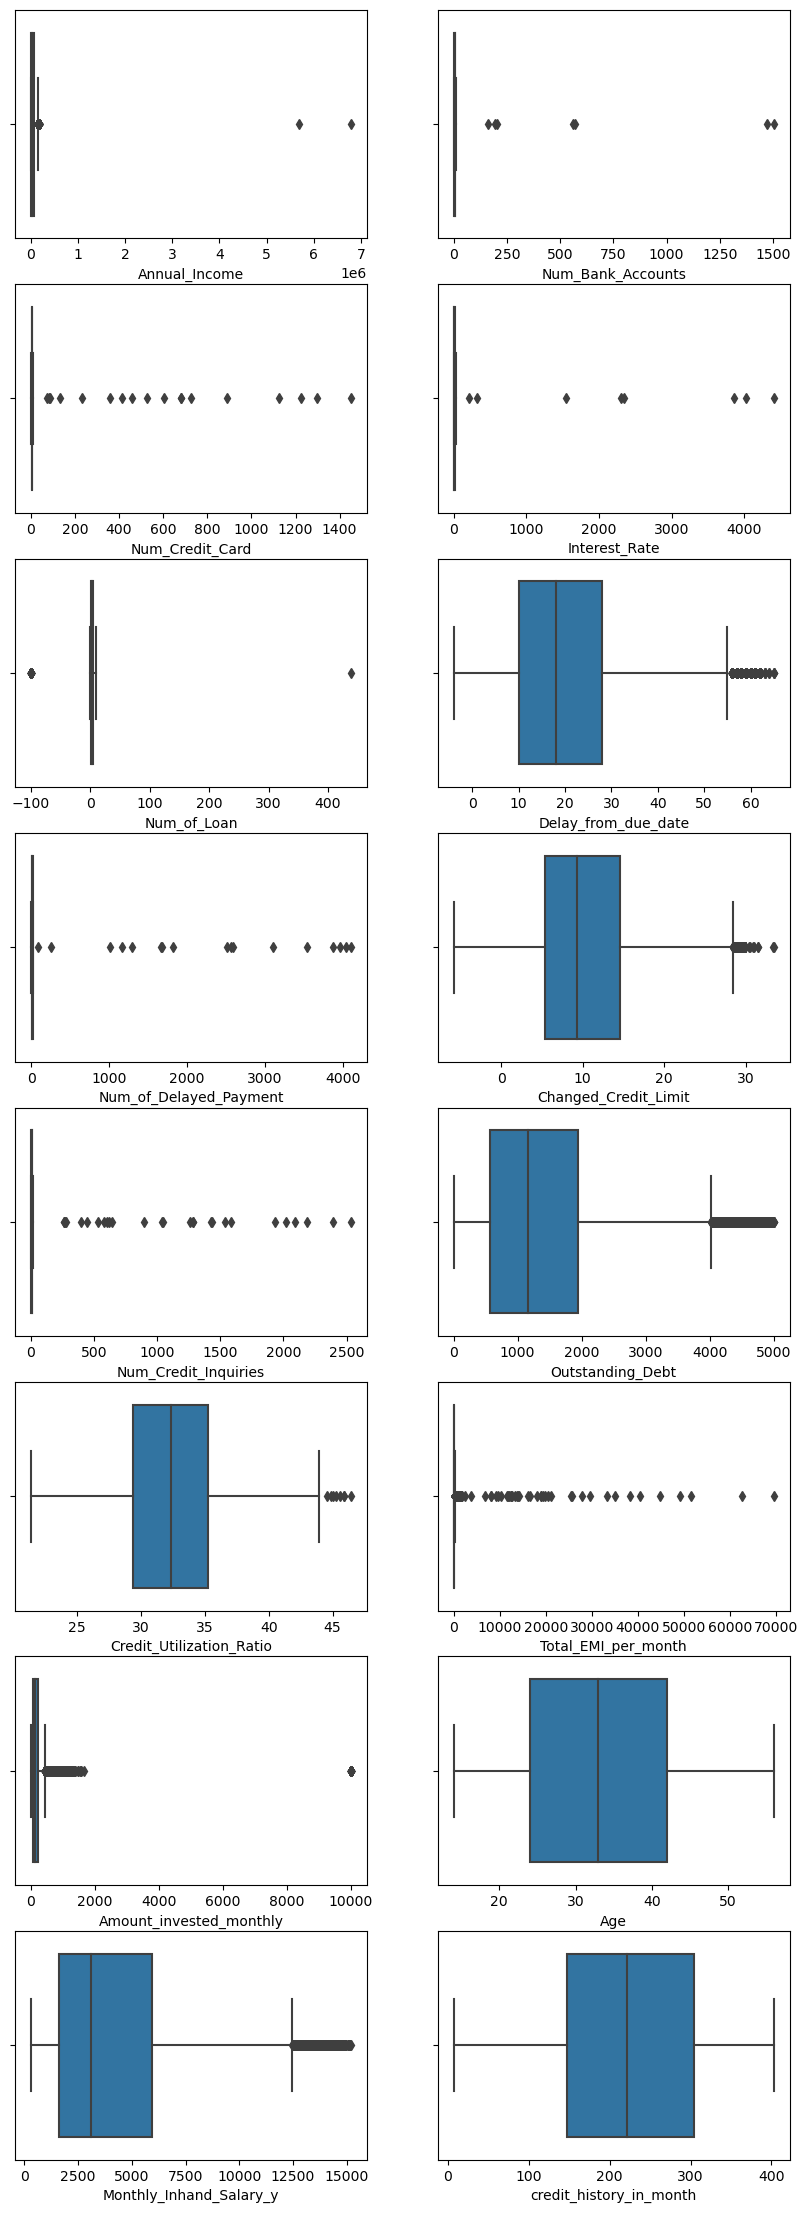

In [542]:
plt.figure(figsize=(10,60))
for i in range(1,len(nom_var)+1):
    plt.subplot(17,2,i)
    sns.boxplot(x=last_3_months[nom_var[i-1]])

<AxesSubplot:xlabel='Annual_Income'>

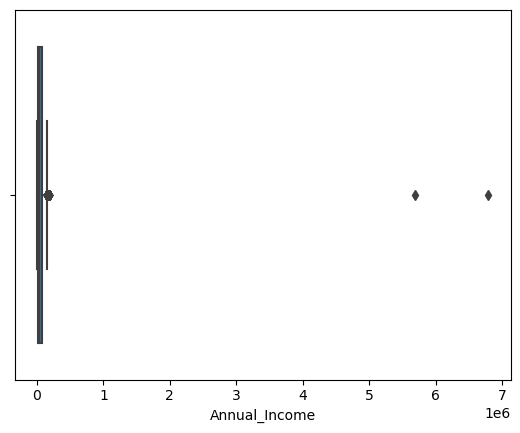

In [543]:
sns.boxplot(x=last_3_months['Annual_Income'])

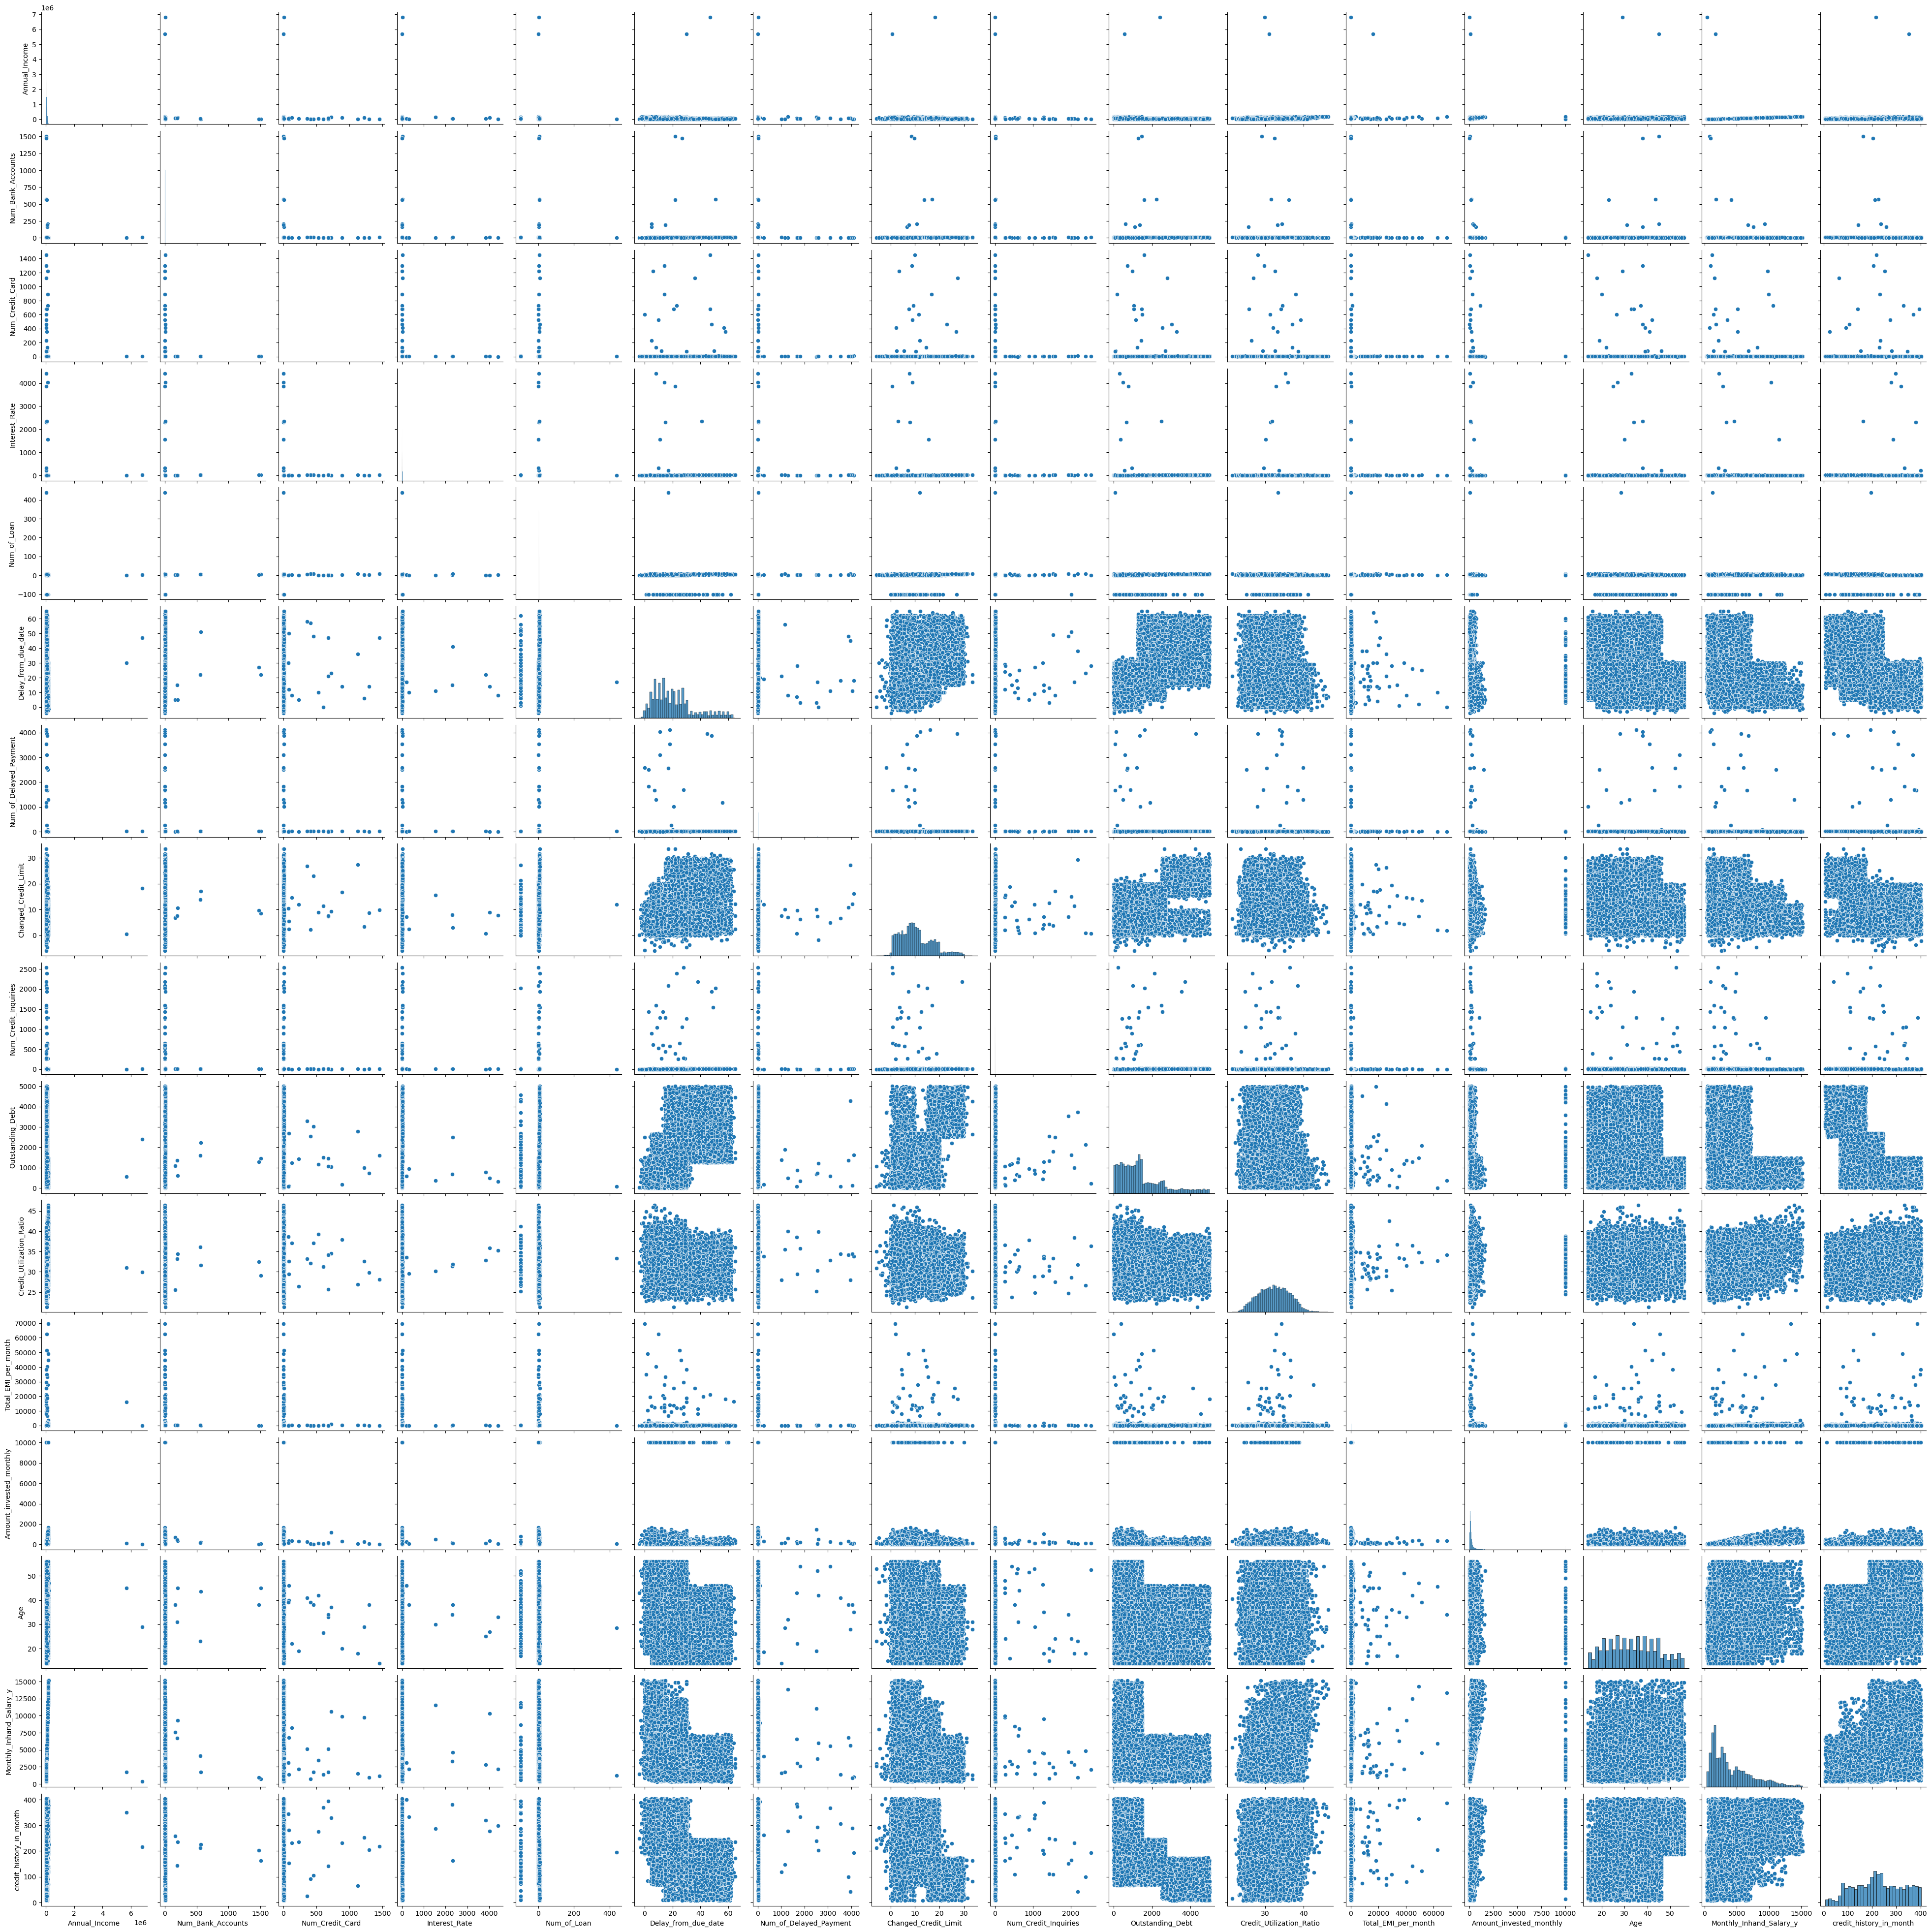

In [544]:
sns.pairplot(last_3_months[nom_var])

Observation from these pairplot analysis are
1.With increase in monthly balance,the delay from due dates will be reduced and variance of delay in payment will decrease
2.with increase in monthly balance,the outstanding debt will decrease and step decrease in steps
3.with increase in monthly inhand salary the there is a decrease in (delay in due payements,change in credit limit,and outstandig debt
4.with increase in credit history age->decrease in delay from due date,decrease in outstanding debt,beter monthly balance are maintained

The factors which positively effect the credit  scores are 
1.Annual Income
2.credit mix(some credit have higher interest rates and longer repayment time so,it tends to be costly loans)
3.credit history age
4.Amount invested per month
5.monthly inhand salary
6.
Similarly the factors which negatively impact the credit scores are
1.Number of loans---can positively affect if the loans are repaid on time otherwise it negtively affect the credit score
2.Number of credit card
3.Number of Credti inquiries made in last 3 months 
4.outstanding debts

Grey area
1.total number of emi per month have both +ve and -ve effect on credit worthiness
2.total emi per month---if a persons have high emi to monthly inhand salary ratio,then he will be left with less net income .so he can't repay the loan properly.It also depends on his annual income


In [545]:
last_3_months.columns

Index(['Customer_ID', 'Month', 'Annual_Income', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'credit_mix', 'Age',
       'Monthly_Inhand_Salary_y', 'credit_history_in_month', 'Auto Loan',
       'Credit-Builder Loan', 'Personal Loan', 'Home Equity Loan',
       'Not Specified', 'Mortgage Loan', 'Student Loan',
       'Debt Consolidation Loan', 'Payday Loan', 'spent_High', 'spent_Low',
       'value_payment_Large', 'value_payment_Medium', 'value_payment_Small',
       'Payment_of_Min_Amount_NM', 'Payment_of_Min_Amount_No',
       'Payment_of_Min_Amount_Yes', 'occupation_Accountant',
       'occupation_Architect', 'occupation_Developer', 'occupation_Doctor',
       'occupation_Engineer', 'occupation_Entrepreneur',
       'occupation_Journalis

In [546]:
cat_var=[]
for i in last_3_months.columns:
    if i not in nom_var:
        cat_var.append(i)
cat_var

['Customer_ID',
 'Month',
 'credit_mix',
 'Auto Loan',
 'Credit-Builder Loan',
 'Personal Loan',
 'Home Equity Loan',
 'Not Specified',
 'Mortgage Loan',
 'Student Loan',
 'Debt Consolidation Loan',
 'Payday Loan',
 'spent_High',
 'spent_Low',
 'value_payment_Large',
 'value_payment_Medium',
 'value_payment_Small',
 'Payment_of_Min_Amount_NM',
 'Payment_of_Min_Amount_No',
 'Payment_of_Min_Amount_Yes',
 'occupation_Accountant',
 'occupation_Architect',
 'occupation_Developer',
 'occupation_Doctor',
 'occupation_Engineer',
 'occupation_Entrepreneur',
 'occupation_Journalist',
 'occupation_Lawyer',
 'occupation_Manager',
 'occupation_Mechanic',
 'occupation_Media_Manager',
 'occupation_Musician',
 'occupation_Scientist',
 'occupation_Teacher',
 'occupation_Writer']

IndexError: list index out of range

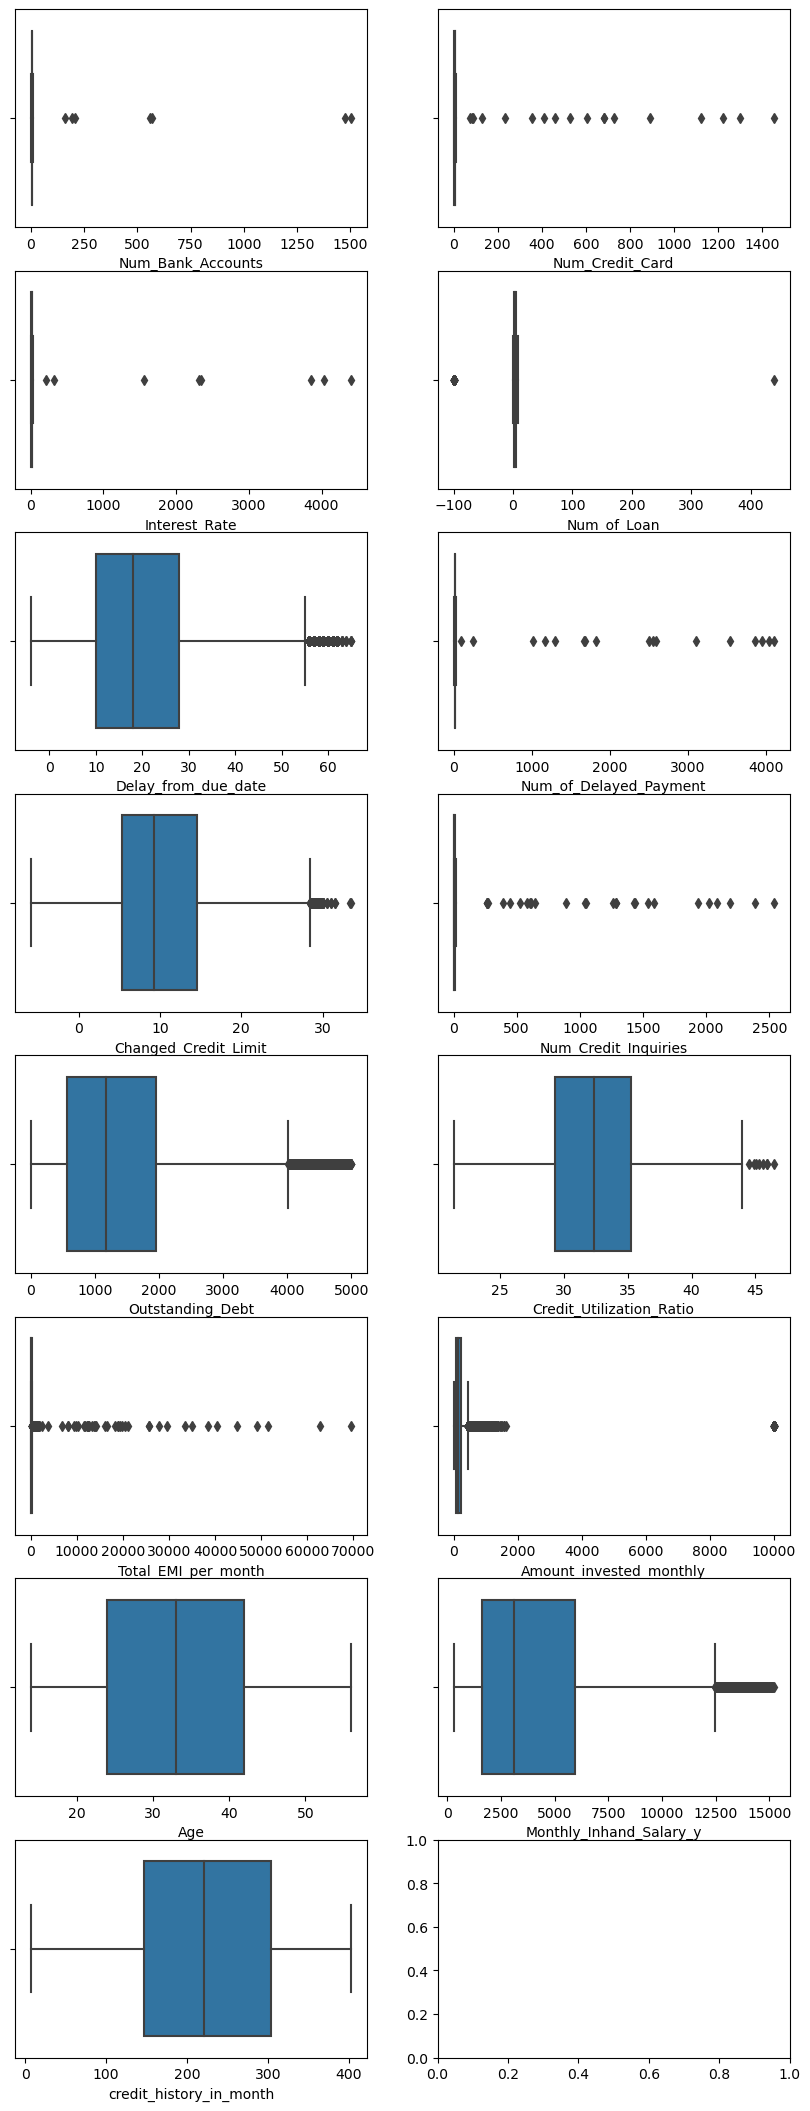

In [547]:
#need to treat the outliers otherwise in scaling the outliers will have a great impact on the data
plt.figure(figsize=(10,30))
l=len(nom_var)
for i in range(1,l+1):
    plt.subplot(l//2+1,2,i)
    sns.boxplot(x=last_3_months[nom_var[i]])

In [ ]:
#lets the scale the data using standard scaler
from sklearn.preprocessing import StandardScaler,MinMaxScaler
standard=StandardScaler()
scaler=MinMaxScaler()
x=last_3_months.iloc[:,1:]

In [ ]:
l=len(nom_var)
temp_df=last_3_months.copy()
for i in range(l):
    iqr=np.percentile(last_3_months[nom_var[i]],75)-np.percentile(last_3_months[nom_var[i]],25)
    mn=np.percentile(last_3_months[nom_var[i]],25)-1.5*iqr
    mx=np.percentile(last_3_months[nom_var[i]],75)+1.5*iqr
    temp_df=temp_df[(temp_df[nom_var[i]]>mn) & (temp_df[nom_var[i]]<mx)]

In [ ]:
#columns which we need for credit score calculation are credit mix,credit history age,payment history(max delay in payment and outstanding loan),credit_utilisation_ratio,

In [ ]:
# last_3_months.info()
last_3_months['emi/monthly_inhand_ratio']=last_3_months['Total_EMI_per_month']/last_3_months['Monthly_Inhand_Salary_y']
last_3_months[['Num_of_Loan','Num_Credit_Card']]
last_3_months['loan_to_credit_card_ratio']=last_3_months['Num_of_Loan']/last_3_months['Num_Credit_Card']

In [ ]:
last_3_months.info()
target_columns=[53,54,7,8,12,15,18,3,4]
credit_score_calc=last_3_months.iloc[:,target_columns]

In [ ]:
#lets remove outliers from credit score calc dataframe
n=1
plt.figure(figsize=(10,20))
l=len(credit_score_calc.columns)
for i in credit_score_calc.columns:
    plt.subplot(l,1,n)
    n+=1
    sns.boxplot(x=credit_score_calc[i])


In [ ]:
credit_score_calc['loan_to_credit_card_ratio']=credit_score_calc['loan_to_credit_card_ratio'].apply(lambda x:0 if x<0 else x)
credit_score_calc=credit_score_calc[credit_score_calc['emi/monthly_inhand_ratio']<1]
credit_score_calc=credit_score_calc[credit_score_calc['Num_of_Delayed_Payment']<100]
credit_score_calc


In [ ]:
# Payment History (35%)

# Accounts Owed (30%)

# Length of Credit History (15%)

# Credit Mix (10%)

# New Credit (10%)


In [ ]:
#1.for payment history calculation,delay from due date and number of delayed payments can be considered 
#credit score must be better for the customers who have lesser delay in payment and lower number of delayed payments
#lets normalise these two factors wrt max value in both columns
def max_scaler(df,col):
    df[col]=(df[col].max()-df[col])/(df[col].max()-df[col].min())
    return df
for i in ['Delay_from_due_date','Num_of_Delayed_Payment']:
    credit_score_calc=max_scaler(credit_score_calc,i)

In [ ]:
credit_score_calc.head()

In [ ]:
#2.for accounts owned 
#for this lets consider,number of bank accouts and number of credit cards
#use max scaler
for i in ['Num_Bank_Accounts','Num_Credit_Card']:
    credit_score_calc=max_scaler(credit_score_calc,i)

In [ ]:
credit_score_calc.head()

In [ ]:
#3.for length of credit history lets take credit history in months
#for this we will apply min scaler
def min_scaler(df,col):
    df[col]=(df[col]-df[col].min())/(df[col].max()-df[col].min())
    return df
credit_score_calc=min_scaler(credit_score_calc,'credit_history_in_month')
credit_score_calc.head()

In [ ]:
#4.for credit mix which is given directly lets use min scaler for this
credit_score_calc=min_scaler(credit_score_calc,'credit_mix')

In [ ]:
#5.for new credit calculation lets use emi/monthly inhand ratio ,loan to credit card ratio and credit utilisation ratio
#here  i will use max scaler
for i in ['emi/monthly_inhand_ratio','Credit_Utilization_Ratio']:
    credit_score_calc=max_scaler(credit_score_calc,i)
credit_score_calc.head()

In [ ]:
credit_score_calc=credit_score_calc[credit_score_calc['loan_to_credit_card_ratio']<5]
credit_score_calc['loan_credit_scaled']=(credit_score_calc['loan_to_credit_card_ratio'].max()-credit_score_calc['loan_to_credit_card_ratio'])/(credit_score_calc['loan_to_credit_card_ratio'].max()-credit_score_calc['loan_to_credit_card_ratio'].min())

In [ ]:
credit_score_calc

In [ ]:
#fico score varies from 300 to 850
#300 is the base score and 850 is the highest score 
# 1.Payment History (35%)
###a.Delay_from_due_date
###b.Num_of_Delayed_Payment

# 2.Accounts Owed (30%)
###a.Num_Bank_Accounts
###b.Num_Credit_Card

# 3.Length of Credit History (15%)
###a.credit_history_in_month

# 4.Credit Mix (10%)
### a.credit_mix

# 5.New Credit (10%)
###a.emi/monthly_inhand_ratio
###b.loan_credit_scaled
###c.Credit_Utilization_Ratio

In [ ]:
credit_score_calc['credit_score']=300+(0.35*.5*(credit_score_calc['Delay_from_due_date']+credit_score_calc['Num_of_Delayed_Payment'])+.15*(credit_score_calc['Num_Bank_Accounts']+credit_score_calc['Num_Credit_Card'])+.15*(credit_score_calc['credit_history_in_month'])+0.1*credit_score_calc['credit_mix']+0.1*(1/3)*(credit_score_calc['emi/monthly_inhand_ratio']+credit_score_calc['loan_credit_scaled']+credit_score_calc['Credit_Utilization_Ratio']))*550

In [467]:
credit_score_calc

emi/monthly_inhand_ratio  loan_to_credit_card_ratio  \
0                      0.983250                   0.400000   
1                      0.973087                   0.800000   
2                      1.000000                   0.000000   
3                      0.974986                   1.000000   
4                      0.969772                   1.000000   
...                         ...                        ...   
12495                  0.970120                   0.500000   
12496                  0.955726                   0.714286   
12497                  0.986258                   0.333333   
12498                  0.944813                   1.000000   
12499                  0.948493                   0.857143   

       Delay_from_due_date  Num_of_Delayed_Payment  Credit_Utilization_Ratio  \
0                 0.043478                0.685393                  0.330735   
1                 0.869565                0.764045                  0.498431   
2                 0.739130                0.887640                  0.688528   
3                 0.550725                0.797753                  0.742142   
4                 0.768116                0.865169                  0.595259   
...                    ...                     ...                       ...   
12495             0.753623                0.887640                  0.778595   
12496             0.710145                0.820225                  0.472777   
12497             0.927536                0.887640                  0.846539   
12498             0.275362                0.752809                  0.694440   
12499             0.608696                0.831461                  0.377756   

       credit_mix  credit_history_in_month  Num_Bank_Accounts  \
0             0.0                 0.305556           0.996008   
1             0.5                 0.919192           0.996008   
2             1.0                 0.459596           0.999335   
3             0.5                 0.459596           0.998004   
4             1.0                 0.520202           0.998004   
...           ...                      ...                ...   
12495         1.0                 0.505051           1.000000   
12496         0.5                 0.547980           0.994677   
12497         1.0                 0.734848           0.996673   
12498         0.0                 0.378788           0.996008   
12499         0.5                 0.547980           0.994677   

       Num_Credit_Card  loan_credit_scaled  credit_score  
0             0.996556            0.900000    600.338516  
1             0.996556            0.800000    766.599383  
2             0.997245            1.000000    763.500880  
3             0.997934            0.750000    705.103176  
4             0.997934            0.750000    762.227399  
...                ...                 ...           ...  
12495         0.995868            0.875000    767.398837  
12496         0.995179            0.821429    725.418315  
12497         0.995868            0.916667    805.127221  
12498         0.994490            0.750000    638.230577  
12499         0.995179            0.785714    714.205862  

[12441 rows x 11 columns]

KeyError: 'SSN'

In [550]:
data=pd.read_csv(r"C:\Users\Asus\Downloads\Credit_score.csv",low_memory=False)
data['SSN'].value_counts()

#F%$D@*&8      5572
078-73-5990       8
486-78-3816       8
750-67-7525       8
903-50-0305       8
               ... 
856-06-6147       4
753-72-2651       4
331-28-1921       4
604-62-6133       4
286-44-9634       4
Name: SSN, Length: 12501, dtype: int64

In [ ]:
dada